In [69]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:

def dimensionalty(A):
    dimensionality = A.shape[1]
    return dimensionalty

def vector_space(A):
    num_vectors = A.shape[0]
    return num_vectors

def rank(A):
    rank_A = np.linalg.matrix_rank(A)
    return rank_A

def cost_of_each_product(A):
    A_pseudo_inv = np.linalg.pinv(A)

    costs = A_pseudo_inv @ C
    return costs



file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = data['Payment (Rs)'].to_numpy()
dimensionalty = dimensionalty(A)
print(f"Dimensionality of the vector space: {dimensionality}")
num_vectors = vector_space(A)
print(f"Number of vectors in this vector space: {num_vectors}")
rank_A = rank(A)
print(f"Rank of Matrix A: {rank_A}")
costs = cost_of_each_product(A)
print(f"Cost of each product: {costs}")



Dimensionality of the vector space: 3
Number of vectors in this vector space: 10
Rank of Matrix A: 3
Cost of each product: [ 1. 55. 18.]


In [38]:
def cost_of_each_product(A):
    A_pseudo_inv = np.linalg.pinv(A)

    costs = A_pseudo_inv @ C
    return costs

file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')

A = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].to_numpy()
C = data['Payment (Rs)'].to_numpy()
costs = cost_of_each_product(A)
print(f"Cost of each product: {costs}")

Cost of each product: [ 1. 55. 18.]


In [39]:
def mark_customers(data):
    data['Grade'] = data['Payment (Rs)'].apply(lambda x: 'Rich' if x > 200 else 'POOR')
    return data


file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='Purchase data')
updated_data = mark_customers(data)
print(updated_data)


output_file_path = 'Lab Session Data Updated.xlsx'
updated_data.to_excel(output_file_path, index=False)
print(f"Updated data saved to {output_file_path}")

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN       

Population Mean: 1560.663453815261
Population Variance: 58732.365352539186
Sample Mean (Wednesdays): 1550.706
Difference between Sample Mean of Wed and Population Mean: -9.957453815261033
Sample Mean (April): 1698.9526315789474
Difference between Sample Mean of Apr and Population Mean: 138.28917776368644
Probability of making a loss over the stock: 0.4980
Probability of making a profit on wednesday over the stock: 0.4200
Conditional Probability of making a profit given that today is Wednesday: 2.0916
Scatter plot is 


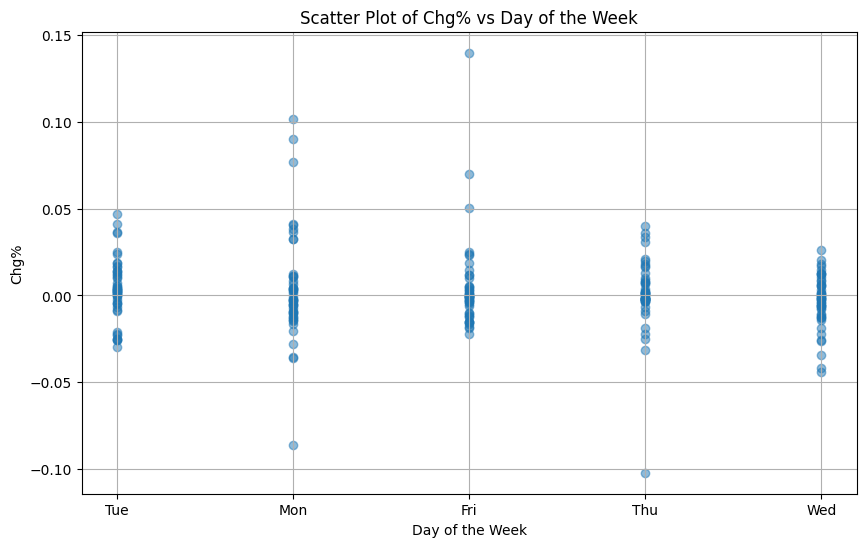

In [40]:
import statistics as stats

def mean_variance(data):
     prices = data['Price'].tolist()
     population_mean = stats.mean(prices)
     population_variance = stats.variance(prices)
     return (population_mean, population_variance)

def Wednesday_mean(data):
    wednesdays = data[data['Day'] == 'Wed']
    wednesday_prices = wednesdays['Price'].tolist()
    sample_mean = stats.mean(wednesday_prices)
    return sample_mean

def April_mean(data):
    Aprils = data[data['Month'] == 'Apr']
    April_prices = Aprils['Price'].tolist()
    sample_mean = stats.mean(April_prices)
    return sample_mean

def loss_stock(data):
    total_count = len(data)
    loss_count = data['Chg%'].apply(lambda x: x < 0).sum()
    probability_of_loss = loss_count / total_count
    return probability_of_loss

def Wednesday_profit(data):
    wednesdays = data[data['Day'] == 'Wed']
    total_count = len(wednesdays)
    loss_count = wednesdays['Chg%'].apply(lambda x: x > 0).sum()
    probability_of_loss = loss_count / total_count
    return probability_of_loss

def conditional_prob_profit_given_wednesday(data):
    prob_profit_wednesday = Wednesday_profit(data)
    prob_wednesday = len(data[data['Day'] == 'Wed']) / len(data)
    conditional_prob = prob_profit_wednesday / prob_wednesday
    return conditional_prob
    
def Scatter_Plot(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['Day'], data['Chg%'], alpha=0.5)
    plt.title('Scatter Plot of Chg% vs Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.grid(True)
    plt.show()


file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')
population_mean, population_variance = mean_variance(data)
print(f"Population Mean: {population_mean}")
print(f"Population Variance: {population_variance}")

sample_mean = Wednesday_mean(data)
print(f"Sample Mean (Wednesdays): {sample_mean}")

print(f"Difference between Sample Mean of Wed and Population Mean: {sample_mean - population_mean}")

sample_mean_Apr = April_mean(data)
print(f"Sample Mean (April): {sample_mean_Apr}")

print(f"Difference between Sample Mean of Apr and Population Mean: {sample_mean_Apr - population_mean}")

probability_of_loss = loss_stock(data)
print(f"Probability of making a loss over the stock: {probability_of_loss:.4f}")

probability_of_loss_wed = Wednesday_profit(data)
print(f"Probability of making a profit on wednesday over the stock: {probability_of_loss_wed:.4f}")

conditional_probability = conditional_prob_profit_given_wednesday(data)
print(f"Conditional Probability of making a profit given that today is Wednesday: {conditional_probability:.4f}")  

print("Scatter plot is ")
Scatter_Plot(data)

In [44]:
file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')
attributes_info = {
    'Attribute Name': [
        'Record ID', 'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
        'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
        'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured',
        'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source', 'Condition'
    ],
    'Datatype': [
        'Nominal', 'Continuous', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal',
        'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Nominal',
        'Continuous', 'Nominal', 'Continuous', 'Nominal', 'Continuous', 'Nominal', 'Continuous', 'Nominal',
        'Continuous', 'Nominal', 'Continuous', 'Nominal', 'Nominal'
    ],
    'Description': [
        'Record Identifier', 'Age of patient', 'Sex of patient', 'On thyroxine medication', 'Query on thyroxine medication',
        'On antithyroid medication', 'Sick', 'Pregnant', 'Thyroid surgery', 'I131 treatment', 'Query hypothyroid',
        'Query hyperthyroid', 'Lithium', 'Goitre', 'Tumor', 'Hypopituitary', 'Psychological conditions',
        'TSH measured', 'TSH level', 'T3 measured', 'T3 level', 'TT4 measured', 'TT4 level', 'T4U measured',
        'T4U level', 'FTI measured', 'FTI level', 'TBG measured', 'TBG level', 'Referral source', 'Condition of the patient'
    ]
}

attributes_df = pd.DataFrame(attributes_info)
print(attributes_df)

               Attribute Name    Datatype                    Description
0                   Record ID     Nominal              Record Identifier
1                         age  Continuous                 Age of patient
2                         sex     Nominal                 Sex of patient
3                on thyroxine     Nominal        On thyroxine medication
4          query on thyroxine     Nominal  Query on thyroxine medication
5   on antithyroid medication     Nominal      On antithyroid medication
6                        sick     Nominal                           Sick
7                    pregnant     Nominal                       Pregnant
8             thyroid surgery     Nominal                Thyroid surgery
9              I131 treatment     Nominal                 I131 treatment
10          query hypothyroid     Nominal              Query hypothyroid
11         query hyperthyroid     Nominal             Query hyperthyroid
12                    lithium     Nominal          

In [45]:

file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

categorical_columns = [
    'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
    'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid',
    'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured',
    'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'Condition'
]
encoded_data = pd.get_dummies(data, columns=categorical_columns)

print(encoded_data.head())

   Record ID  age  TSH   T3  TT4 T4U FTI TBG  sex_?  sex_F  ...  Condition_MI  \
0  840801013   29  0.3    ?    ?   ?   ?   ?  False   True  ...         False   
1  840801014   29  1.6  1.9  128   ?   ?   ?  False   True  ...         False   
2  840801042   41    ?    ?    ?   ?   ?  11  False   True  ...         False   
3  840803046   36    ?    ?    ?   ?   ?  26  False   True  ...         False   
4  840803047   32    ?    ?    ?   ?   ?  36  False   True  ...         False   

   Condition_MK  Condition_N  Condition_NO CONDITION  Condition_O  \
0         False        False                    True        False   
1         False        False                    True        False   
2         False        False                    True        False   
3         False        False                    True        False   
4         False        False                   False        False   

   Condition_OI  Condition_P  Condition_Q  Condition_R  Condition_S  
0         False        False

In [46]:

file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

numeric_data = data[numeric_columns]

numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

print(numeric_data.describe())


                age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG  
count  8370.000000  349.000000  
mean    113.640746   29.870057  
std      41.551650   21.080504  
min       1.400000    0.100000  
25%      93.000000   21.000000  
50%     109.000000   26.000000  
75%     128.000000   31.000000  
max     881.000000  200.000000  


In [49]:
file_path = 'Lab Session Data.xlsx'
data = pd.read_excel(file_path, sheet_name='thyroid0387_UCI')

data.replace('?', np.nan, inplace=True)
missing_values = data.isnull().sum()

print(missing_values[missing_values > 0])

total_missing = data.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")


sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64
Total missing values in the dataset: 14629


C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\2572041776.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)


In [58]:

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_columns)

print("Outliers (IQR method):")
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
print(f"Column '{col}':")
print("Outliers count:", outliers.shape[0])
print(outliers[[col]].head())

Numeric Columns:
 Index(['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')
Outliers (IQR method):
Column 'TBG':
Outliers count: 29
        TBG
868    53.0
1076   50.0
1549  108.0
1606    0.1
1921    3.1


In [59]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:\n", numeric_columns)

for col in numeric_columns:
    mean = data[col].mean()
    variance = data[col].var()
    std_dev = data[col].std()

    print(f"\nColumn '{col}':")
    print(f"Mean = {mean:.2f}")
    print(f"Variance = {variance:.2f}")
    print(f"Standard Deviation = {std_dev:.2f}")

Numeric Columns:
 Index(['Record ID', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')

Column 'Record ID':
Mean = 852947346.61
Variance = 57486250586150.28
Standard Deviation = 7581968.78

Column 'age':
Mean = 73.56
Variance = 1401800.87
Standard Deviation = 1183.98

Column 'TSH':
Mean = 5.22
Variance = 584.87
Standard Deviation = 24.18

Column 'T3':
Mean = 1.97
Variance = 0.79
Standard Deviation = 0.89

Column 'TT4':
Mean = 108.70
Variance = 1407.95
Standard Deviation = 37.52

Column 'T4U':
Mean = 0.98
Variance = 0.04
Standard Deviation = 0.20

Column 'FTI':
Mean = 113.64
Variance = 1726.54
Standard Deviation = 41.55

Column 'TBG':
Mean = 29.87
Variance = 444.39
Standard Deviation = 21.08


In [66]:
file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.replace('?', np.nan, inplace=True)

print("Missing values before imputation:\n", df.isnull().sum())

def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if detect_outliers_iqr(df[col]).sum() > 0:

        df[col] = df[col].fillna(df[col].median())
    else:

        df[col] = df[col].fillna(df[col].mean())

categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after imputation:\n", df.isnull().sum())


Missing values before imputation:
 Record ID                       0
age                             0
sex                           307
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG          

C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\4214479737.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='ignore')

numeric_columns = df.select_dtypes(include=[np.number]).columns


min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

min_max_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] 
df[min_max_columns] = min_max_scaler.fit_transform(df[min_max_columns])


standard_columns = ['TBG']  
df[standard_columns] = standard_scaler.fit_transform(df[standard_columns])


print(df.head())

print(df.describe())


   Record ID       age sex on thyroxine query on thyroxine  \
0  840801013  0.000427   F            f                  f   
1  840801014  0.000427   F            f                  f   
2  840801042  0.000610   F            f                  f   
3  840803046  0.000534   F            f                  f   
4  840803047  0.000473   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured       TT4 T4U measured T4U FTI measured FTI TBG measured  \
0            f       NaN            f NaN            f NaN       

C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\623084681.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)
C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\623084681.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [74]:
import pandas as pd
import numpy as np

file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

for col in df.columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

binary_columns = df.columns[df.apply(lambda col: set(col.dropna().unique()) <= {0, 1})]

print("Binary columns:", binary_columns)

first_two_vectors = df.loc[0:1, binary_columns]

print("First two vectors:\n", first_two_vectors)

first_two_vectors = first_two_vectors.fillna(0)  # Fill NaN with 0

vector1 = first_two_vectors.iloc[0].values
vector2 = first_two_vectors.iloc[1].values

f11 = np.sum((vector1 == 1) & (vector2 == 1))
f10 = np.sum((vector1 == 1) & (vector2 == 0))
f01 = np.sum((vector1 == 0) & (vector2 == 1))
f00 = np.sum((vector1 == 0) & (vector2 == 0))

denominator_jc = f01 + f10 + f11
denominator_smc = f00 + f01 + f10 + f11

jc = f11 / denominator_jc if denominator_jc != 0 else np.nan

smc = (f11 + f00) / denominator_smc if denominator_smc != 0 else np.nan

print(f'Jaccard Coefficient (JC): {jc}')
print(f'Simple Matching Coefficient (SMC): {smc}')


Unique values in 'Record ID': [840801013 840801014 840801042 ... 870119025 870119027 870119035]
Unique values in 'age': [   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
Unique values in 'sex': [nan]
Unique values in 'on thyroxine': [nan]
Unique values in 'query on thyroxine': [nan]
Unique values in 'on antithyroid medication': [nan]
Unique values in 'sick': [nan]
Unique values in 'pregnant': [nan]
Unique values in 'thyroid surgery': [n

C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\1912238725.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [75]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.replace('?', np.nan, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(0, inplace=True)

vector1 = df.iloc[0].values.reshape(1, -1)
vector2 = df.iloc[1].values.reshape(1, -1)

cosine_sim = cosine_similarity(vector1, vector2)

print(f'Cosine Similarity: {cosine_sim[0][0]}')


Cosine Similarity: 0.9999999999999883


C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\1557482491.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


C:\Users\K.lohith\AppData\Local\Temp\ipykernel_10132\3787941818.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


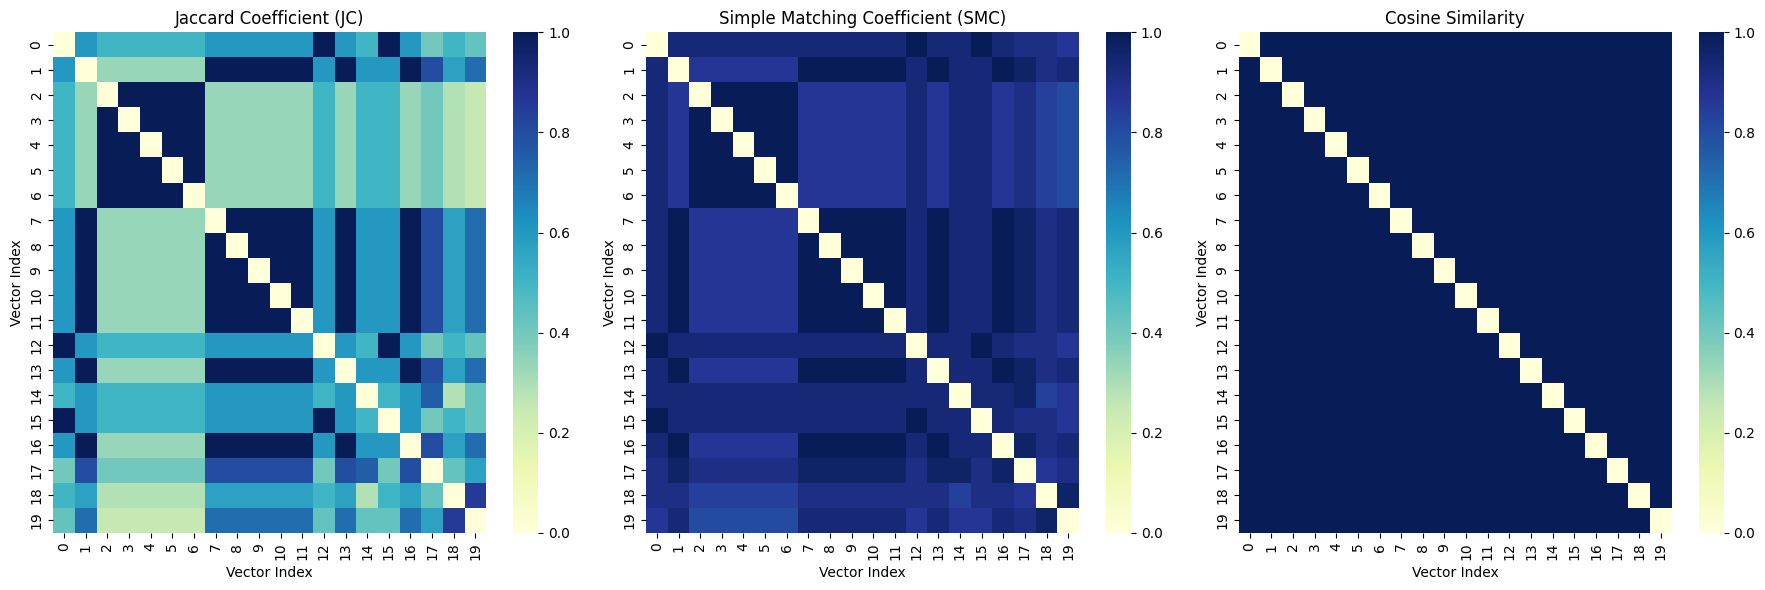

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

file_path = 'Lab Session Data.xlsx'
sheet_name = 'thyroid0387_UCI'
df = pd.read_excel(file_path, sheet_name=sheet_name)

df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

df_subset = df.head(20)

jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        if i != j:
            vector_i = df_subset.iloc[i].values
            vector_j = df_subset.iloc[j].values

            cosine_matrix[i, j] = cosine_similarity([vector_i], [vector_j])[0][0]
        
            binary_vector_i = (vector_i != 0).astype(int)
            binary_vector_j = (vector_j != 0).astype(int)
            
            f11 = np.sum((binary_vector_i == 1) & (binary_vector_j == 1))
            f10 = np.sum((binary_vector_i == 1) & (binary_vector_j == 0))
            f01 = np.sum((binary_vector_i == 0) & (binary_vector_j == 1))
            f00 = np.sum((binary_vector_i == 0) & (binary_vector_j == 0))
       
            jc_matrix[i, j] = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else np.nan
            
            smc_matrix[i, j] = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else np.nan

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(jc_matrix, annot=False, cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Jaccard Coefficient (JC)')
axes[0].set_xlabel('Vector Index')
axes[0].set_ylabel('Vector Index')

sns.heatmap(smc_matrix, annot=False, cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Simple Matching Coefficient (SMC)')
axes[1].set_xlabel('Vector Index')
axes[1].set_ylabel('Vector Index')

sns.heatmap(cosine_matrix, annot=False, cmap='YlGnBu', ax=axes[2])
axes[2].set_title('Cosine Similarity')
axes[2].set_xlabel('Vector Index')
axes[2].set_ylabel('Vector Index')

plt.tight_layout()
plt.show()
